# PORTUGAL: Shapefiles gerais

In [1]:
# http://forest-gis.com/2012/01/portugal-shapefiles-gerais-do-pais.html/
# https://www.europeandataportal.eu/data/en/dataset?q=portugal&country=pt


In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd


In [3]:
path = 'ML/GeoPandas/Portugal/'

In [13]:
# Tables Brasil and states
uf_pt1 = gpd.read_file(path + 'PRT_adm_shp/PRT_adm0.shp')
uf_pt2 = gpd.read_file(path + 'PRT_adm_shp/PRT_adm1.shp')
uf_pt3 = gpd.read_file(path + 'PRT_adm_shp/PRT_adm2.shp')


In [14]:
# Portugal
uf_pt1.head()

,ID_0,ISO,NAME_ENGLI,NAME_ISO,NAME_FAO,NAME_LOCAL,NAME_OBSOL,NAME_VARIA,NAME_NONLA,NAME_FRENC,...,CARICOM,EU,CAN,ACP,Landlocked,AOSIS,SIDS,Islands,LDC,geometry
0,182,PRT,Portugal,PORTUGAL,Portugal,Portugal,None,Azores|Madeira,None,Portugal,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(POLYGON ((-16.05834770202637 30.0301990509033...


In [68]:
# Portugal - Distritos
uf_pt2.head()
uf_pt2[uf_pt2.TYPE_1 == 'Regiões autônoma'].head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
2,182,PRT,Portugal,3,Azores,PT.AC,0,None,Regiões autônoma,'Autonomous Region',None,Açores,(POLYGON ((-25.08909606933588 37.0156211853027...
12,182,PRT,Portugal,13,Madeira,None,0,None,Regiões autônoma,'Autonomous Region',None,None,(POLYGON ((-16.05834770202637 30.0301990509034...


In [28]:
# Delete information about Autonomos Regions (Açores e Madeira)
uf_pt2x = uf_pt2[uf_pt2.TYPE_1 != 'Regiões autônoma']

In [47]:
# Portugal - Concelhos
uf_pt3.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
index_right,,,,,,,,,,,,,,,
0,182,PRT,Portugal,1,Évora,1,Évora,PT.EV.EV,0,0705,Concelho,Municipality,None,None,"POLYGON ((-7.79291391372675 38.7650718688966, ..."
1,182,PRT,Portugal,1,Évora,2,Alandroal,PT.EV.AL,0,0701,Concelho,Municipality,None,None,POLYGON ((-7.259370803833008 38.77350616455101...
2,182,PRT,Portugal,1,Évora,3,Arraiolos,PT.EV.AR,0,0702,Concelho,Municipality,None,None,POLYGON ((-7.886110782623234 38.92494583129894...
3,182,PRT,Portugal,1,Évora,4,Borba,PT.EV.BO,0,0703,Concelho,Municipality,None,None,POLYGON ((-7.463624954223576 38.92343521118158...
4,182,PRT,Portugal,1,Évora,5,Estremoz,PT.EV.ES,0,0704,Concelho,Municipality,None,None,POLYGON ((-7.527699947357121 39.00079727172857...


In [120]:
# Delete information about Autonomos Regions (Açores e Madeira)
uf_pt3x = uf_pt3.copy()
uf_pt3x = uf_pt3x[uf_pt3x.NAME_1 != 'Madeira']
uf_pt3x = uf_pt3x[uf_pt3x.NAME_1 != 'Açores']
uf_pt3x = uf_pt3x[uf_pt3x.NAME_1 != 'Azores']

# Managing INTERSECTS in Geo Spacial points betwen DISTRITS and CONCELHOS - Excluded Acores e Madeira

#concelhos_with_distritos = gpd.sjoin(uf_pt2x, uf_pt3, how='inner', op='intersects')
#concelhos_with_distritos = gpd.sjoin(uf_pt2x, uf_pt3, how='left', op='within')
uf_pt3x.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
index_right,,,,,,,,,,,,,,,
0,182,PRT,Portugal,1,Évora,1,Évora,PT.EV.EV,0,0705,Concelho,Municipality,None,None,"POLYGON ((-7.79291391372675 38.7650718688966, ..."
1,182,PRT,Portugal,1,Évora,2,Alandroal,PT.EV.AL,0,0701,Concelho,Municipality,None,None,POLYGON ((-7.259370803833008 38.77350616455101...
2,182,PRT,Portugal,1,Évora,3,Arraiolos,PT.EV.AR,0,0702,Concelho,Municipality,None,None,POLYGON ((-7.886110782623234 38.92494583129894...
3,182,PRT,Portugal,1,Évora,4,Borba,PT.EV.BO,0,0703,Concelho,Municipality,None,None,POLYGON ((-7.463624954223576 38.92343521118158...
4,182,PRT,Portugal,1,Évora,5,Estremoz,PT.EV.ES,0,0704,Concelho,Municipality,None,None,POLYGON ((-7.527699947357121 39.00079727172857...


In [121]:
concelhos_with_distritos =  uf_pt3x.copy()
# Filter only one district Acores
#concelhos_with_distritos[concelhos_with_distritos.HASC_1 == 'PT.AC'].head()

concelhos_with_distritos[concelhos_with_distritos.NAME_1  == 'Porto'].head()


,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
index_right,,,,,,,,,,,,,,,
208,182,PRT,Portugal,15,Porto,207,Amarante,PT.PO.AM,0,1301,Concelho,Municipality,None,None,POLYGON ((-7.972868919372559 41.36389541625971...
209,182,PRT,Portugal,15,Porto,208,Baião,PT.PO.BA,0,1302,Concelho,Municipality,None,None,POLYGON ((-7.884912014007568 41.24785995483404...
210,182,PRT,Portugal,15,Porto,209,Felgueiras,PT.PO.FE,0,1303,Concelho,Municipality,None,None,"POLYGON ((-8.20706844329834 41.4108161926269, ..."
211,182,PRT,Portugal,15,Porto,210,Gondomar,PT.PO.GO,0,1304,Concelho,Municipality,None,None,"POLYGON ((-8.52708625793457 41.20302581787109,..."
212,182,PRT,Portugal,15,Porto,211,Lousada,PT.PO.LO,0,1305,Concelho,Municipality,None,None,POLYGON ((-8.316142082214242 41.35116195678711...


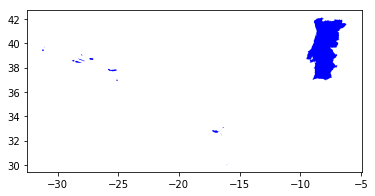

In [122]:
# Portugal
uf_pt1.plot(color='blue')

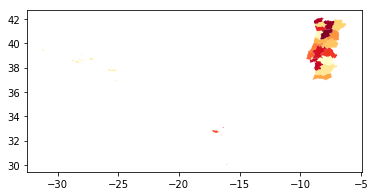

In [123]:
# Distritos
uf_pt2.plot(cmap='YlOrRd')

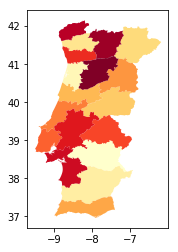

In [124]:
# Distritos
uf_pt2x.plot(cmap='YlOrRd')

In [125]:
# Transform POLYGON to POINT
# copy poly to new GeoDataFrame
points = uf_pt2x.copy()
# change the geometry
points.geometry = points['geometry'].centroid
# same crs
#points.crs = poly.crs
points.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
index_left,,,,,,,,,,,,,
0,182,PRT,Portugal,1,Évora,PT.EV,0,None,Distrito,District,None,None,POINT (-7.841807617604943 38.60387237507667)
1,182,PRT,Portugal,2,Aveiro,PT.AV,0,01,Distrito,District,None,None,POINT (-8.464918562075658 40.72356219053533)
3,182,PRT,Portugal,4,Beja,PT.BE,0,02,Distrito,District,None,None,POINT (-7.943892470329469 37.82970596252276)
4,182,PRT,Portugal,5,Braga,PT.BR,0,03,Distrito,District,None,None,POINT (-8.309432985526078 41.55295905761618)
5,182,PRT,Portugal,6,Bragança,PT.BA,0,04,Distrito,District,None,Braganza,POINT (-6.859319866300944 41.50939616830968)


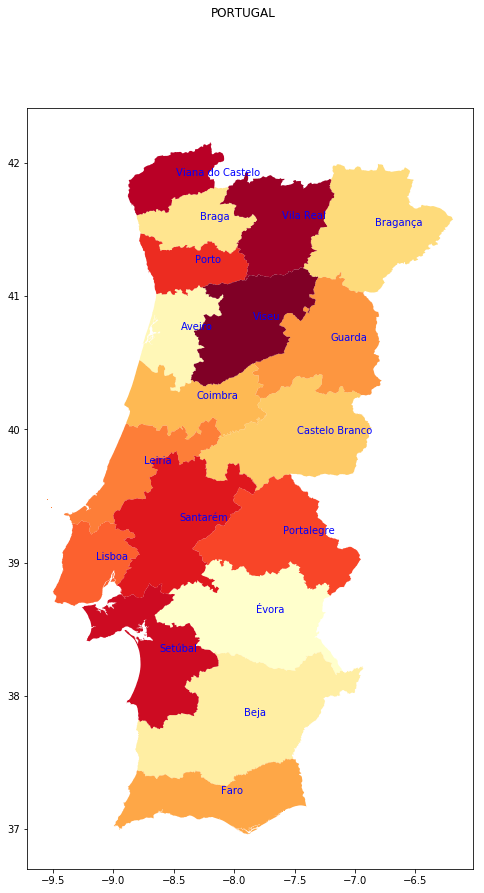

In [133]:
# PLOT Distrits points
f, ax = plt.subplots(1, figsize=(8,14))
ax.set_axis_on()
f.suptitle('PORTUGAL')
# Plot the states area
ax = uf_pt2x.plot(ax=ax, facecolor='blue', alpha=1, linewidth=0, cmap='YlOrRd')

# Plot the labels 
for x, y, label in zip(points.geometry.x, points.geometry.y, points.NAME_1):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), alpha=3, textcoords="offset points",color='blue')

In [135]:
uf_pt3x[uf_pt3x.NAME_1  == 'Porto'].head(20)


,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
index_right,,,,,,,,,,,,,,,
208,182,PRT,Portugal,15,Porto,207,Amarante,PT.PO.AM,0,1301,Concelho,Municipality,None,None,POLYGON ((-7.972868919372559 41.36389541625971...
209,182,PRT,Portugal,15,Porto,208,Baião,PT.PO.BA,0,1302,Concelho,Municipality,None,None,POLYGON ((-7.884912014007568 41.24785995483404...
210,182,PRT,Portugal,15,Porto,209,Felgueiras,PT.PO.FE,0,1303,Concelho,Municipality,None,None,"POLYGON ((-8.20706844329834 41.4108161926269, ..."
211,182,PRT,Portugal,15,Porto,210,Gondomar,PT.PO.GO,0,1304,Concelho,Municipality,None,None,"POLYGON ((-8.52708625793457 41.20302581787109,..."
212,182,PRT,Portugal,15,Porto,211,Lousada,PT.PO.LO,0,1305,Concelho,Municipality,None,None,POLYGON ((-8.316142082214242 41.35116195678711...
213,182,PRT,Portugal,15,Porto,212,Maia,PT.PO.MI,0,1306,Concelho,Municipality,None,None,POLYGON ((-8.621764183044377 41.29537200927734...
214,182,PRT,Portugal,15,Porto,213,Marco de Canaveses,PT.PO.MC,0,1307,Concelho,Municipality,None,None,POLYGON ((-8.137008666992188 41.25824737548834...
215,182,PRT,Portugal,15,Porto,214,Matosinhos,PT.PO.MT,0,1308,Concelho,Municipality,None,None,POLYGON ((-8.704297065734863 41.27227020263689...
216,182,PRT,Portugal,15,Porto,215,Póvoa de Varzim,PT.PO.PV,0,1313,Concelho,Municipality,None,None,POLYGON ((-8.758174896240178 41.46694183349638...


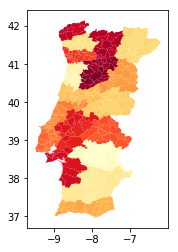

In [128]:
# Concelhos
uf_pt3x.plot(cmap='YlOrRd')

In [129]:
# Transform POLYGON to POINT
# copy poly to new GeoDataFrame
points2 = concelhos_with_distritos.copy()
# change the geometry
points2.geometry = points2['geometry'].centroid
# same crs
#points.crs = poly.crs
points2.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
index_right,,,,,,,,,,,,,,,
0,182,PRT,Portugal,1,Évora,1,Évora,PT.EV.EV,0,0705,Concelho,Municipality,None,None,POINT (-7.870227820320782 38.53313641008285)
1,182,PRT,Portugal,1,Évora,2,Alandroal,PT.EV.AL,0,0701,Concelho,Municipality,None,None,POINT (-7.382903542244738 38.61577024923209)
2,182,PRT,Portugal,1,Évora,3,Arraiolos,PT.EV.AR,0,0702,Concelho,Municipality,None,None,POINT (-7.916383299756945 38.78675043453124)
3,182,PRT,Portugal,1,Évora,4,Borba,PT.EV.BO,0,0703,Concelho,Municipality,None,None,POINT (-7.469354864742858 38.81652498686883)
4,182,PRT,Portugal,1,Évora,5,Estremoz,PT.EV.ES,0,0704,Concelho,Municipality,None,None,POINT (-7.613682412971558 38.84545338913198)


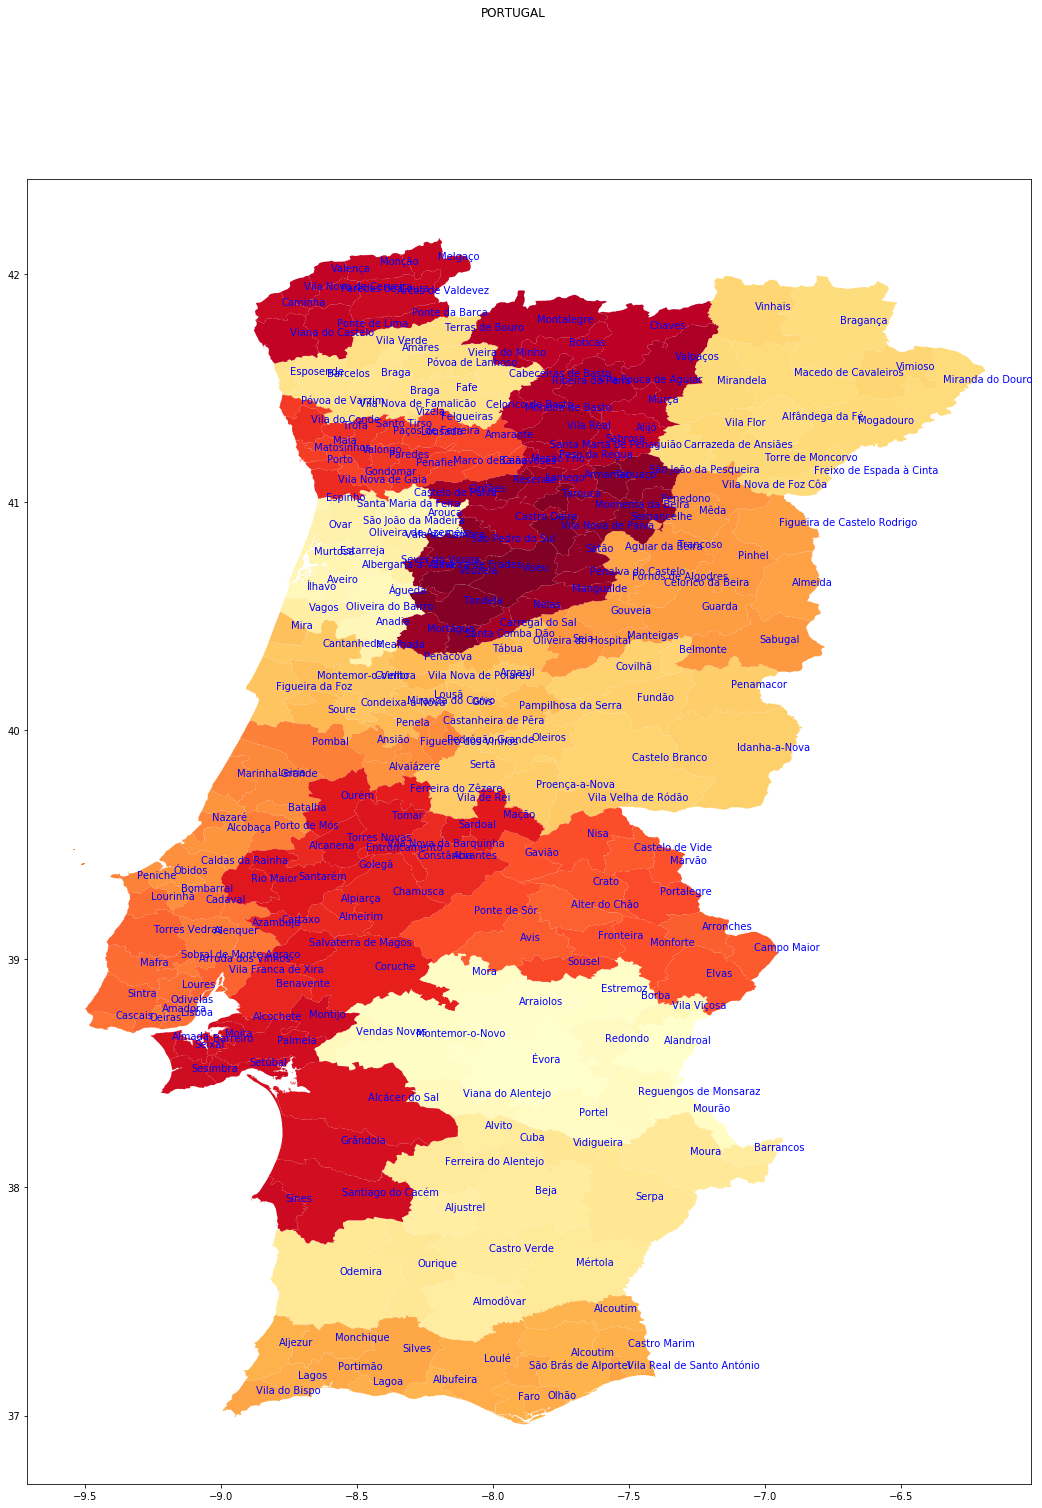

In [131]:
# PLOT Concelhos points
f, ax = plt.subplots(1, figsize=(18,24))
ax.set_axis_on()
f.suptitle('PORTUGAL')
# Plot the states area
ax = concelhos_with_distritos.plot(ax=ax, facecolor='blue', alpha=1, linewidth=0, cmap='YlOrRd')

# Plot the labels 
for x, y, label in zip(points2.geometry.x, points2.geometry.y, points2.NAME_2):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), alpha=3, textcoords="offset points",color='blue')